In [1]:
import pandas as pd

df = pd.read_csv('donnees_pretentrainees.xls')


In [2]:
#Séparation des variables :
X = df.drop('Outcome', axis=1)
y = df['Outcome']


In [3]:
#Division des données en ensemble d’entraînement et de test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [4]:
#Traitement du déséquilibre (si y est déséquilibré)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt


In [6]:
# Création du modèle
model = LogisticRegression(max_iter=1000)

# Entraînement sur les données équilibrées (X_train_res, y_train_res par exemple si tu as utilisé SMOTE)
model.fit(X_train_bal, y_train_bal)



c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [7]:
# Prédictions sur les données de test
y_pred = model.predict(X_test)


In [8]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC AUC
y_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC AUC Score: {roc_auc:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1251
           1       0.98      0.98      0.98       657

    accuracy                           0.99      1908
   macro avg       0.99      0.98      0.98      1908
weighted avg       0.99      0.99      0.99      1908

Confusion Matrix:
[[1240   11]
 [  16  641]]
ROC AUC Score: 1.00


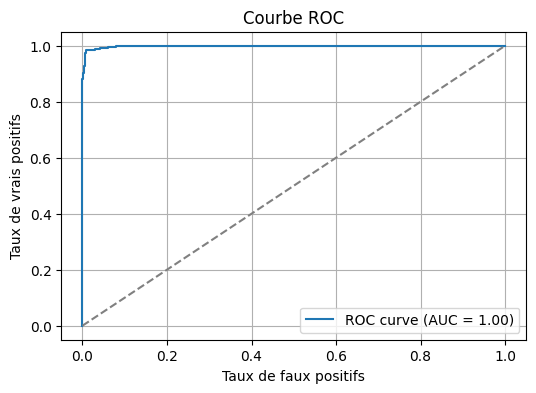

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbe ROC')
plt.legend()
plt.grid()
plt.show()


In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# 5-fold cross-validation sur l’accuracy
scores = cross_val_score(LogisticRegression(), X, y, cv=5, scoring='accuracy')

print("Scores pour chaque fold :", scores)
print("Moyenne :", scores.mean())
print("Écart-type :", scores.std())


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

Scores pour chaque fold : [0.96645702 0.97484277 0.971174   0.96696382 0.96591505]
Moyenne : 0.9690705323760305
Écart-type : 0.003434211358771499


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


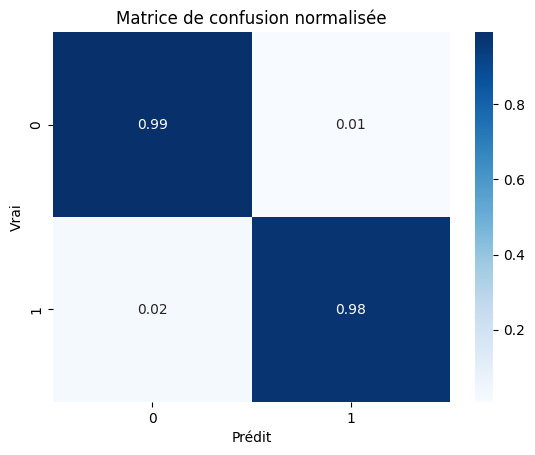

In [11]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='true')  # ou 'pred'
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel("Prédit")
plt.ylabel("Vrai")
plt.title("Matrice de confusion normalisée")
plt.show()


In [12]:
import pandas as pd
coef = model.coef_[0]
features = X.columns

importance = pd.DataFrame({
    'Variable': features,
    'Coefficient': coef
}).sort_values(by='Coefficient', ascending=False)

print(importance)


         Variable  Coefficient
9   FamilyHistory    15.931721
8             WHR     0.681248
3         Glucose     0.156371
2             BMI     0.032468
0             Age     0.019380
6             HDL     0.001781
5             LDL     0.001704
7   Triglycerides     0.000199
4   BloodPressure    -0.010930
1     Pregnancies    -0.038602
10  MedicationUse    -0.161969
11        outlier    -2.053844


In [13]:
from sklearn.linear_model import LogisticRegression
import joblib

# Enregistrez le modèle
joblib.dump(model, r"c:\Users\pc\OneDrive - Université Sultan Moulay Slimane\Bureau\pfe\modeldiabete3.pkl")

['c:\\Users\\pc\\OneDrive - Université Sultan Moulay Slimane\\Bureau\\pfe\\modeldiabete3.pkl']

In [14]:
# Étape 5 : Créer des données d'entrée pour la prédiction
import numpy as np
input_data = np.array([[2, 120, 70, 20, 80, 25.0, 0.5, 30]])

In [15]:
model_path = r"C:\Users\pc\OneDrive - Université Sultan Moulay Slimane\Bureau\pfe\modeldiabete3.pkl"
loaded_model = joblib.load(model_path)
try:
    prediction = loaded_model.predict(input_data)[0]
    proba = loaded_model.predict_proba(input_data)[0][1]
    print(f"Prédiction : {prediction}, Probabilité : {proba:.2%}")
except Exception as e:
    print(f"Erreur lors de la prédiction : {e}")

Erreur lors de la prédiction : X has 8 features, but LogisticRegression is expecting 12 features as input.


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [16]:
# Afficher les caractéristiques utilisées
print("Caractéristiques utilisées par le modèle :")
print(df.columns.tolist())

Caractéristiques utilisées par le modèle :
['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'LDL', 'HDL', 'Triglycerides', 'WHR', 'FamilyHistory', 'MedicationUse', 'Outcome', 'outlier']


In [17]:
# Définir les valeurs pour chaque caractéristique
age = 30                     # Âge du patient
pregnancies = 2              # Nombre de grossesses
bmi = 25.0                   # Indice de masse corporelle
glucose = 120                # Taux de glucose
bloodPressure = 70           # Tension artérielle
ldl = 100                    # Cholestérol LDL
hdl = 50                     # Cholestérol HDL
triglycerides = 150          # Taux de triglycérides
whr = 0.85                   # Rapport taille-hanches
family_history = 1           # Antécédents familiaux (1 pour oui, 0 pour non)
medication_use = 0           # Utilisation de médicaments (1 pour oui, 0 pour non)
outcome = 1                  # Résultat (1 pour diabétique, 0 pour non diabétique)
                

# Créer un tableau NumPy avec les données d'entrée
input_data = np.array([[age, pregnancies, bmi, glucose, bloodPressure, ldl, hdl, triglycerides, whr, family_history, medication_use, outcome, ]])
print("Données d'entrée pour la prédiction :")
print(input_data)

Données d'entrée pour la prédiction :
[[ 30.     2.    25.   120.    70.   100.    50.   150.     0.85   1.
    0.     1.  ]]


In [18]:
model_path = r"C:\Users\pc\OneDrive - Université Sultan Moulay Slimane\Bureau\pfe\modeldiabete3.pkl"
loaded_model = joblib.load(model_path)
try:
    prediction = loaded_model.predict(input_data)[0]
    proba = loaded_model.predict_proba(input_data)[0][1]
    print(f"Prédiction : {prediction}, Probabilité : {proba:.2%}")
except Exception as e:
    print(f"Erreur lors de la prédiction : {e}")

Prédiction : 1, Probabilité : 100.00%


c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
